In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregar arquivos para um DataFrame 
df_exames = pd.read_csv('./datasets/exame-diabetes.csv')

In [5]:
# Visualizar estrutura DF

df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [12]:
# Visualizar as 10 primeiras linha do DF
df_exames.head(10)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [10]:
# Verificar quais valores estao presente na coluna genero
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [11]:
# Remover a coluna id_paciente do DF
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [14]:
# Converter uma variavel categorica (genero) em numerica usando o One-Hot Encoding

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [15]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

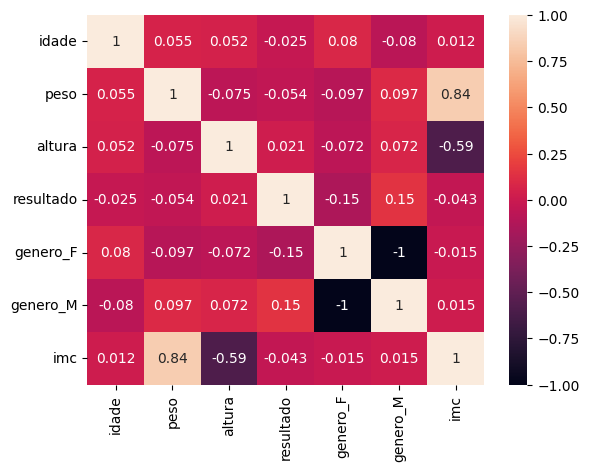

In [26]:
# Apresentar o Mapa de calor com correlacao entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

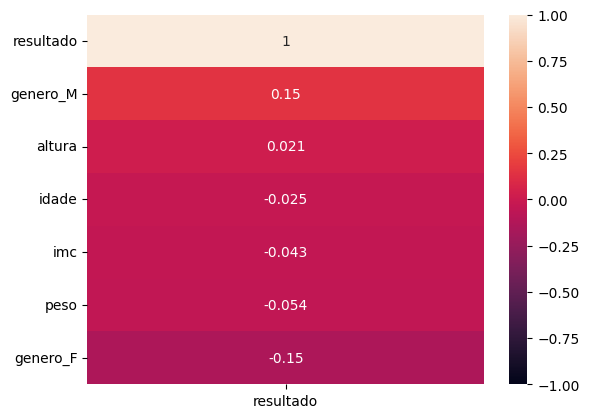

In [27]:
# Apresentar mapa de correlacao so com a variavel target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True) 

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


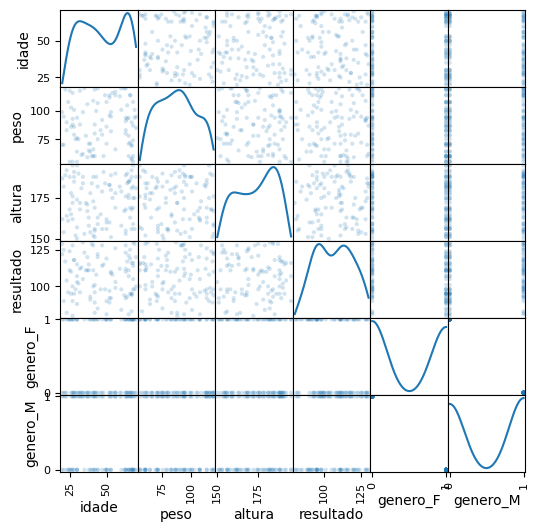

In [22]:
# Plot de Scatter (Dispersao) com distribuicao

pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

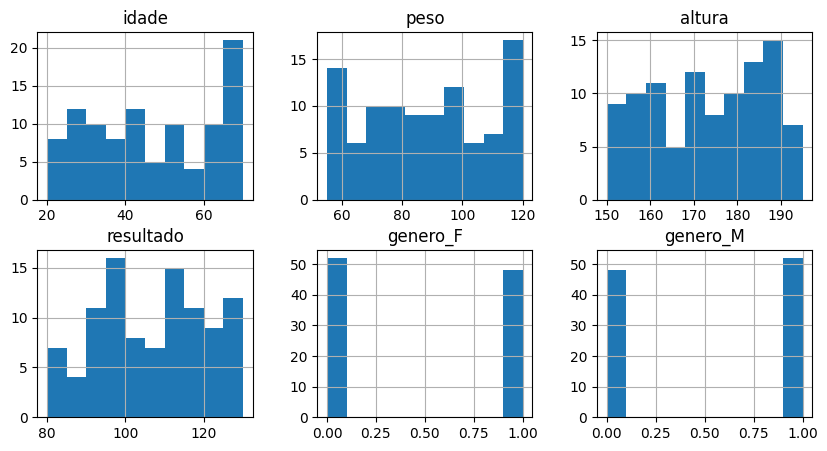

In [21]:
# Histograma de todas as variaveis

df_exames.hist(layout=(2,3), figsize=(10,5))

In [24]:
# Criar uma feature nova
# IMC (Indice de Massa Corporal) 
# IMC = peso / alturaˆ2

df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura'] /100))**2)

In [25]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [28]:
# Importa bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# Modelo 1 - Sem IMC
x = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [32]:
# Dividir conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [38]:
# Treinar o algoritmo de Regressao linear - Modelo 1

model_1 = LinearRegression().fit(x_train, y_train)

In [39]:
# Gerar as predicoes do conjunto de testes com base no Modelo 1

y_pred = model_1.predict(x_test)

In [40]:
# Equacao da reta - valores de a

model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [41]:
# Equacao da reta - valores de b
model_1.intercept_

np.float64(94.2113314201986)

In [43]:
# R2 Score - Conjunto de treinamento
model_1.score(x_train, y_train)

0.06218388634297234

In [44]:
# R2 Score - Conjunto de testes

model_1.score(x_test, y_test)

-0.13640904479106442

In [45]:
# R2 Score - Conjunto de testes

r2_score(y_test, y_pred)

-0.13640904479106442

In [46]:
# MAE - Mean Absolute Error

mean_absolute_error(y_test, y_pred)

12.695569181179545

In [47]:
# Segundo Modelo - Apenas o IMC

x = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [48]:
# Dividir conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [49]:
# Treinar o algoritmo de regressao linear - Modelo 2

model_2 = LinearRegression().fit(x_train, y_train)

In [51]:
# Gerar Predicao com base no modelo para o conjunto de teste

y_pred = model_2.predict(x_test)

In [52]:
model_2.coef_

array([-0.21677589])

In [53]:
model_2.intercept_

np.float64(112.15019229088837)

In [54]:
# R2 Score - Conjunto de treinamento 

model_2.score(x_train, y_train)

0.01528596266480664

In [55]:
# R2 Score - Conjunto de teste

model_2.score(x_test, y_test)

-0.08898328562401758

In [56]:
mean_absolute_error(y_test, y_pred)

12.5056514070601

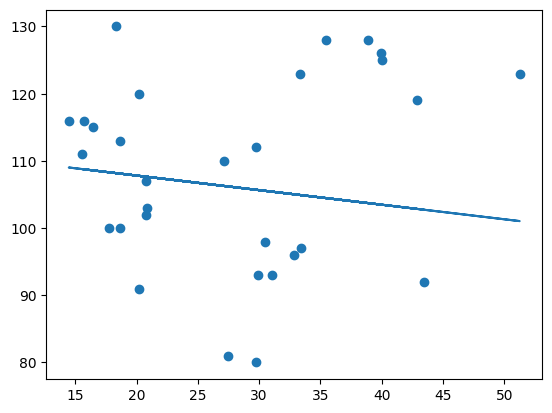

In [59]:
# Mostrar como a reta foi calculada

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)